# Project Topic and Data
This project is called "Personal Key Indicators of Heart Disease". According to the CDC report, heart disease is one of the major causes of death for people of most races in the US, the capability to detect and prevent the factors that have significant impact on heart disease is crucial in healthcare, and machine learning can help to reveal the patterns from the data to predict patient's condition. Another reason for which I am interested in this problem is that I used to work in healthcare industry.  
    
We will use dataset from kaggle https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download&select=heart_2020_cleaned.csv, which is a cleaned-up version from 2020 adult interviews conducted by BRFSS.  
  
We intended to use the data for binary classification to predict if a person has heart disease given a set of numerical and categorical features. This would be a supervised learning problem.  

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is downloaded and uploaded to project git repo https://raw.githubusercontent.com/gt2onew/dtsa5509/main/heart_2020_cleaned.csv


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gt2onew/dtsa5509/main/heart_2020_cleaned.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Data description
According above info of dataframe, this dataset has 319795 samples and 18 columns, 'HeartDisease' is our target y answering "Yes" or "No" about whether the person has heart, the other 17 columns are features which are mixture of numerical and categorical types.  
Here are the descriptions for each column referring original kaggle dataset page:  


*   HeartDisease - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
*   BMI - Body Mass Index (BMI)
*   Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
*   AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
*   Stroke - (Ever told) (you had) a stroke?
*   PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
*   MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
*   DiffWalking - Do you have serious difficulty walking or climbing stairs?
*   Sex - Are you male or female?
*   AgeCategory - Fourteen-level age category
*   Race - Imputed race/ethnicity value
*   Diabetic - (Ever told) (you had) diabetes?
*   PhysicalActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
*   GenHealth - Would you say that in general your health is...
*   SleepTime - On average, how many hours of sleep do you get in a 24-hour period?
*   Asthma - (Ever told) (you had) asthma?
*   KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
*   SkinCancer - (Ever told) (you had) skin cancer?  





In [4]:
# a brief view of first 5 samples
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data cleaning

**Check if there is NA/NUll values**

In [5]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

As the data provided in kaggle is cleaned already, it is no surprise to see that no NA is present.

**Check if there are duplicate rows**

In [6]:
df.duplicated().sum()


18078

We actually should NOT remove the duplicates in this problem that that would skew the real world and not reflect the fact.

**Check if there are outliers**  
There are 4 float64 columns which potentially may have outliers, while PhysicalHealth and MentalHealth feature are bounded by 30 by their nature, so lets look into the rest 2 features:  


*   BMI
*   SleepTime



In [7]:
df[['BMI','SleepTime']].describe()

,BMI,SleepTime
count,319795.000000,319795.000000
mean,28.325399,7.097075
std,6.356100,1.436007
min,12.020000,1.000000
25%,24.030000,6.000000
50%,27.340000,7.000000
75%,31.420000,8.000000
max,94.850000,24.000000


Next, lets visualize those 2 features' distribution

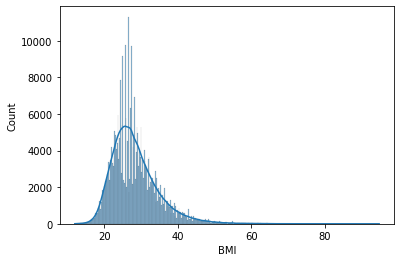

In [8]:
sns.histplot(data=df, x='BMI', kde=True)


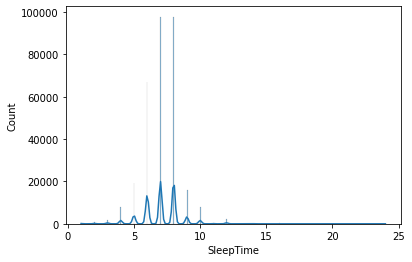

In [9]:
sns.histplot(data=df, x='SleepTime', kde=True)


In [10]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [11]:
len(df['BMI'].unique())

3604

In [12]:
df['SleepTime'].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

In [13]:
len(df['SleepTime'].unique())

24

As Outliers increase the variability of data, which decreases statistical power, excluding outliers can help the results to be more statistically significant.  
Some outliers may relate with typo or entry mistake, e,g, SleepTime = 24 is very suspicious.  
We will restrict the data within (mean - 3\*std, mean + 3\*std)

In [14]:
bmi_data_mean, bmi_data_std = df.BMI.mean(), df.BMI.std()
sleeptime_data_mean, sleeptime_data_std = df.SleepTime.mean(), df.SleepTime.std()
bmi_lower = bmi_data_mean - 3*bmi_data_std
bmi_upper = bmi_data_mean + 3*bmi_data_std
sleeptime_lower = sleeptime_data_mean - 3*sleeptime_data_std
sleeptime_upper = sleeptime_data_mean + 3*sleeptime_data_std

In [15]:
print('bmi_lower : ',bmi_lower)
print('bmi_upper : ',bmi_upper)
print('sleeptime_lower : ',sleeptime_lower)
print('sleeptime_upper : ',sleeptime_upper)

bmi_lower :  9.257097919511772
bmi_upper :  47.393699122340884
sleeptime_lower :  2.7890535055716725
sleeptime_upper :  11.405095871372932


In [16]:
df = df[(df.SleepTime < sleeptime_upper) & (df.SleepTime > sleeptime_lower) 
         &(df.BMI >bmi_lower)&(df.BMI <bmi_upper)]


In [17]:
len(df)

311288

We removed 319795-311288=8507 rows as outliers

**Next, let's look into each categorical feature's values and visualization to determine if we need to encode the variable for data type munging**

Encoding is a required pre-processing step when working with categorical data for machine learning algorithms as Machine learning models require all input and output variables to be numeric.  
We will use ordinal encoding for categorical variables that have a natural rank ordering.  
We will use dummy variable encoding for categorical variables that do not have a natural rank ordering.  
Btw, if categorical feature only has 2 values, ordinal or nominal encoding won't make a difference then.

In [18]:
df['Smoking'].value_counts()

No     183347
Yes    127941
Name: Smoking, dtype: int64

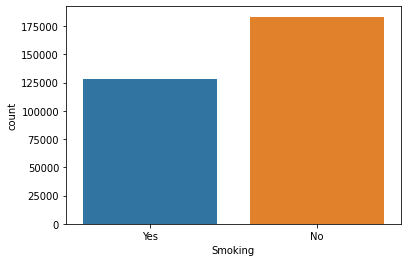

In [19]:
sns.countplot(x ='Smoking', data=df)

In [20]:
# ordinal encoding
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})


In [21]:
df['AlcoholDrinking'].value_counts()

No     289938
Yes     21350
Name: AlcoholDrinking, dtype: int64

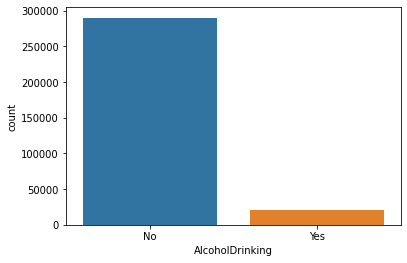

In [22]:
sns.countplot(x ='AlcoholDrinking', data=df)

In [23]:
# ordinal encoding
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})


In [24]:
df['Stroke'].value_counts()

No     299865
Yes     11423
Name: Stroke, dtype: int64

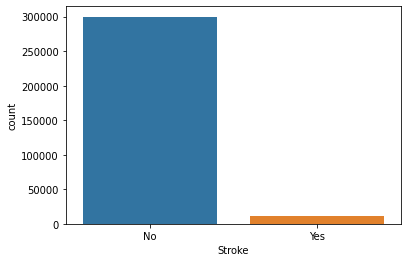

In [25]:
sns.countplot(x ='Stroke', data=df)

In [26]:
# ordinal encoding
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})


In [27]:
df['DiffWalking'].value_counts()

No     270348
Yes     40940
Name: DiffWalking, dtype: int64

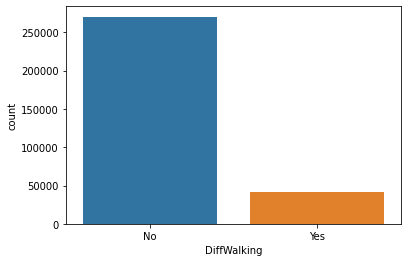

In [28]:
sns.countplot(x ='DiffWalking', data=df)

In [29]:
# ordinal encoding
df['DiffWalking'] = df['DiffWalking'].map({'Yes': 1, 'No': 0})

In [30]:
df['Sex'].value_counts()

Female    162784
Male      148504
Name: Sex, dtype: int64

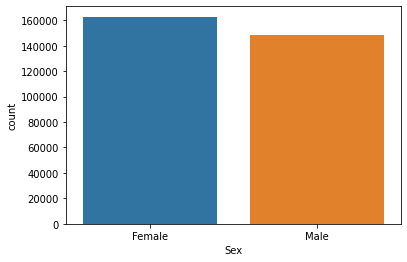

In [31]:
sns.countplot(x ='Sex', data=df)

In [32]:
# it may be controversial to say sex should use ordinal encoding, but since there are only 2 values, it is fine.
df['Sex'] = df['Sex'].map({'Female': 1, 'Male': 0})


In [33]:
df['Diabetic'].value_counts()

No                         263824
Yes                         38450
No, borderline diabetes      6532
Yes (during pregnancy)       2482
Name: Diabetic, dtype: int64

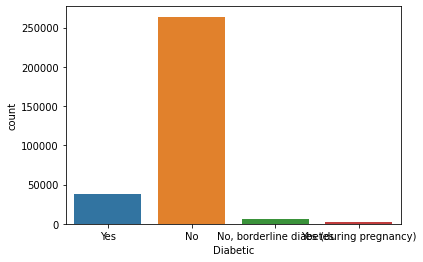

In [34]:
sns.countplot(x ='Diabetic', data=df)

In [35]:
# Due to the very small relative sample size and the main meaning of this feature is Yes or No
# We will care only "Yes" and "No" and encode into 2 numerical values
df['Diabetic'] = df['Diabetic'].map({'Yes': 1, 'Yes (during pregnancy)': 1, 'No, borderline diabetes': 0, 'No': 0})


In [36]:
df['PhysicalActivity'].value_counts()

Yes    243284
No      68004
Name: PhysicalActivity, dtype: int64

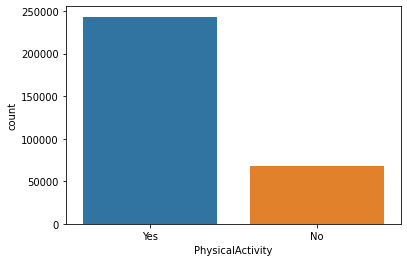

In [37]:
sns.countplot(x ='PhysicalActivity', data=df)

In [38]:
# ordinal encoding
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})

In [39]:
df['GenHealth'].value_counts()

Very good    112286
Good          90282
Excellent     66087
Fair          32553
Poor          10080
Name: GenHealth, dtype: int64

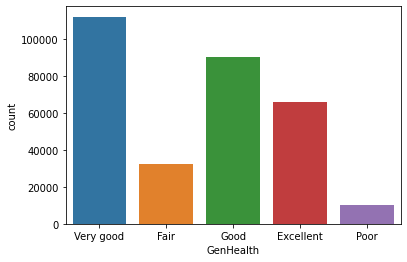

In [40]:
sns.countplot(x ='GenHealth', data=df)

In [41]:
# ordinal encoding
df['GenHealth'] = df['GenHealth'].map({'Excellent': 4, 'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})


In [42]:
df['Asthma'].value_counts()

No     270421
Yes     40867
Name: Asthma, dtype: int64

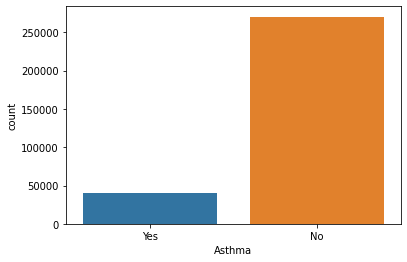

In [43]:
sns.countplot(x ='Asthma', data=df)

In [44]:
# ordinal encoding
df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})


In [45]:
df['KidneyDisease'].value_counts()

No     300180
Yes     11108
Name: KidneyDisease, dtype: int64

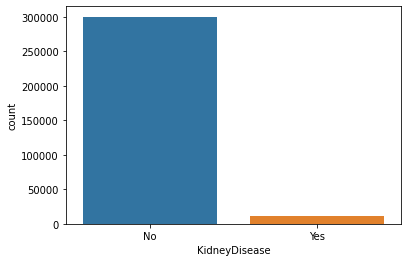

In [46]:
sns.countplot(x ='KidneyDisease', data=df)

In [47]:
# ordinal encoding
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1, 'No': 0})


In [48]:
df['SkinCancer'].value_counts()

No     282067
Yes     29221
Name: SkinCancer, dtype: int64

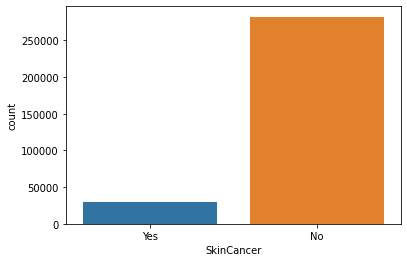

In [49]:
sns.countplot(x ='SkinCancer', data=df)

In [50]:
# ordinal encoding
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1, 'No': 0})


In [51]:
df['AgeCategory'].value_counts()

65-69          33331
60-64          32767
70-74          30395
55-59          28886
50-54          24628
80 or older    23484
45-49          21052
75-79          20980
18-24          20662
40-44          20364
35-39          19950
30-34          18241
25-29          16548
Name: AgeCategory, dtype: int64

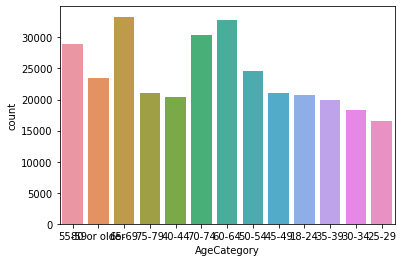

In [52]:
sns.countplot(x ='AgeCategory', data=df)

In [53]:
df['AgeCategory'] = df['AgeCategory'].map({'18-24': 0, 
                                           '25-29': 1,
                                           '30-34': 2,
                                           '35-39': 3,
                                           '40-44': 4,
                                           '45-49': 5,
                                           '50-54': 6,
                                           '55-59': 7,
                                           '60-64': 8,
                                           '65-69': 9,
                                           '70-74': 10,
                                           '75-79': 11,
                                           '80 or older': 12})


Feature Race is special and we will use dummy variable encoding

In [54]:
df = pd.get_dummies(df, columns=['Race'])

Lets also transform target variable HeartDisease which is also categorical

In [55]:
df['HeartDisease'].value_counts()

No     285140
Yes     26148
Name: HeartDisease, dtype: int64

In [56]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})


Clearly, we have huge imbalance between positive 'Yes' and negative 'No' samples, which will be addressed in next section, but now we can see all variables are numerical.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311288 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         311288 non-null  int64  
 1   BMI                                  311288 non-null  float64
 2   Smoking                              311288 non-null  int64  
 3   AlcoholDrinking                      311288 non-null  int64  
 4   Stroke                               311288 non-null  int64  
 5   PhysicalHealth                       311288 non-null  float64
 6   MentalHealth                         311288 non-null  float64
 7   DiffWalking                          311288 non-null  int64  
 8   Sex                                  311288 non-null  int64  
 9   AgeCategory                          311288 non-null  int64  
 10  Diabetic                             311288 non-null  int64  
 11  PhysicalActiv

**Finally in this Data Cleaning section, let's handle value imbalance in target variable HeartDisease**

We can see from target variable HeartDisease's value count that it is heavily imbalanced with 285140 No and 26148 Yes, which means if we come up with a model that always predicts No, we can achieve 91.6% accuracy. It looks very good but the model is useless.  
Balancing data gives us the same amount of information to help predict each class and therefore gives a better idea of how to respond to test data.

In [58]:
285140/(285140+26148)

0.9160006167921667

In [59]:
from sklearn.utils import resample


In [60]:
df_minority = df[df.HeartDisease==1]
df_majority = df[df.HeartDisease==0]


In [61]:
# Upsample heartdisease == 0 to match heartdisease==1
df_minority_upsampled = resample(df_minority, replace=True, n_samples=285140,random_state=42) 

In [62]:
len(df_minority_upsampled)

285140

In [63]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [64]:
len(df_upsampled)

570280

In [65]:
df_upsampled['HeartDisease'].value_counts()

0    285140
1    285140
Name: HeartDisease, dtype: int64

**We will use this df_upsampled dataframe from modeling section but still use df dataframe for EDA in next section**

# Exploratory Data Analysis

**First, lets check correlation heatmap for analysis**

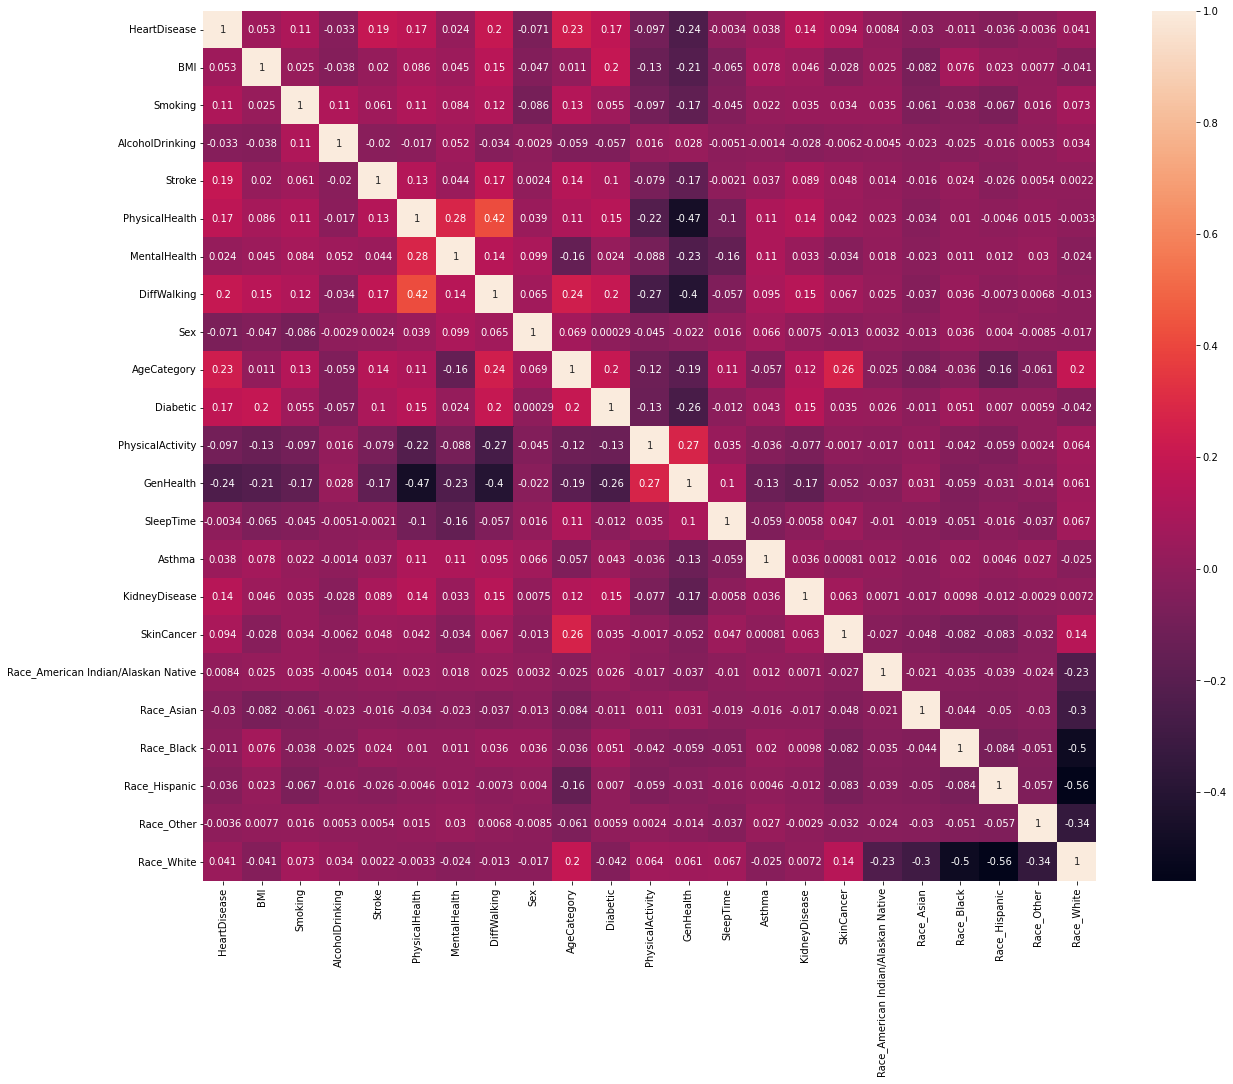

In [66]:
plt.subplots(figsize=(20, 16))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [67]:
corr.HeartDisease.sort_values()

GenHealth                             -0.240971
PhysicalActivity                      -0.096968
Sex                                   -0.071178
Race_Hispanic                         -0.036259
AlcoholDrinking                       -0.032734
Race_Asian                            -0.030498
Race_Black                            -0.011163
Race_Other                            -0.003606
SleepTime                             -0.003362
Race_American Indian/Alaskan Native    0.008392
MentalHealth                           0.024257
Asthma                                 0.038347
Race_White                             0.041318
BMI                                    0.052627
SkinCancer                             0.094486
Smoking                                0.107500
KidneyDisease                          0.142091
PhysicalHealth                         0.166847
Diabetic                               0.172712
Stroke                                 0.192459
DiffWalking                            0

In [68]:
corr.HeartDisease.abs().sort_values()

SleepTime                              0.003362
Race_Other                             0.003606
Race_American Indian/Alaskan Native    0.008392
Race_Black                             0.011163
MentalHealth                           0.024257
Race_Asian                             0.030498
AlcoholDrinking                        0.032734
Race_Hispanic                          0.036259
Asthma                                 0.038347
Race_White                             0.041318
BMI                                    0.052627
Sex                                    0.071178
SkinCancer                             0.094486
PhysicalActivity                       0.096968
Smoking                                0.107500
KidneyDisease                          0.142091
PhysicalHealth                         0.166847
Diabetic                               0.172712
Stroke                                 0.192459
DiffWalking                            0.197450
AgeCategory                            0

From the correlation heatmap:  
- GenHealth, AgeCategory, DiffWalking, Stroke, Diabete, PhysicalHealth seem to have the highest effect on the heart disease.  
- Surprisingly, common sense may suggest BMI to play important role on HearthDisease, but here the data seems not proving its significance.  
- Also, from correlation matrix, races does not seem to contribute much to HeartDisease, but different races do have big difference on the contribution level of correlation ranging from 0.0036 to 0.041



**Statistical tests**

We will run chi-square test on the independence between features and target variable

In [69]:
from scipy.stats import chi2_contingency

In [70]:
def chi_test(x, y):
  tab = pd.crosstab(x, y)
  chi_value, p_value, deg_free, _ = chi2_contingency(tab)
  return {'Chi value': chi_value, 'P value': p_value}

In [71]:
features = list(df.columns)
features.remove('HeartDisease')

In [72]:
for feature in features:
  print('Feature ： ',feature, chi_test(df[feature], df['HeartDisease']))

Feature ：  BMI {'Chi value': 5427.954259246759, 'P value': 4.8500247671897686e-179}
Feature ：  Smoking {'Chi value': 3596.503866296046, 'P value': 0.0}
Feature ：  AlcoholDrinking {'Chi value': 333.07822350224217, 'P value': 2.0528416495897753e-74}
Feature ：  Stroke {'Chi value': 11526.558879271704, 'P value': 0.0}
Feature ：  PhysicalHealth {'Chi value': 9062.1069647082, 'P value': 0.0}
Feature ：  MentalHealth {'Chi value': 875.0948176855129, 'P value': 1.0558625934799016e-164}
Feature ：  DiffWalking {'Chi value': 12133.902085151447, 'P value': 0.0}
Feature ：  Sex {'Chi value': 1576.5464139930896, 'P value': 0.0}
Feature ：  AgeCategory {'Chi value': 18943.454537660265, 'P value': 0.0}
Feature ：  Diabetic {'Chi value': 9283.701089791366, 'P value': 0.0}
Feature ：  PhysicalActivity {'Chi value': 2926.141655611361, 'P value': 0.0}
Feature ：  GenHealth {'Chi value': 20619.078919310825, 'P value': 0.0}
Feature ：  SleepTime {'Chi value': 1793.4964801793906, 'P value': 0.0}
Feature ：  Asthma {

With significance level 0.05, chi squared test suggests all features are NOT independent with target variable HeartDisease.  
Almost all the features are very significant except Race_Other which P value is closer to threshold 0.05

**Feature analysis with visualization**

In [73]:
df.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Sex                                      int64
AgeCategory                              int64
Diabetic                                 int64
PhysicalActivity                         int64
GenHealth                                int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
Race_American Indian/Alaskan Native      uint8
Race_Asian                               uint8
Race_Black                               uint8
Race_Hispanic                            uint8
Race_Other   

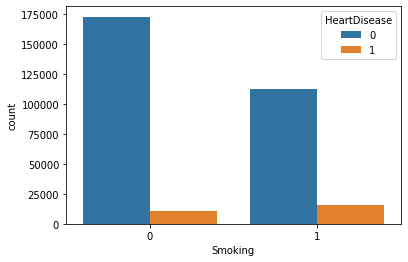

In [74]:
sns.countplot(data=df,x="Smoking",hue="HeartDisease")


**Smoking seems not having significant impact on people with heart disease**

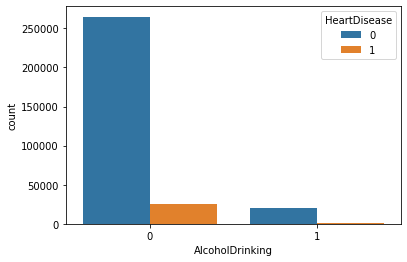

In [75]:
sns.countplot(data=df,x="AlcoholDrinking",hue="HeartDisease")


**Alcohol drinking does not seem having much impact, and refer previous section's correlation analysis, its correlation coefficient is negative even**

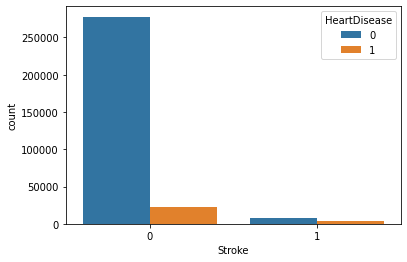

In [76]:
sns.countplot(data=df,x="Stroke",hue="HeartDisease")


**By comparing the ratio between count of heartdisease samples and non-heartdisease samples, stroke does seem more prevalant on people with heartdisease**

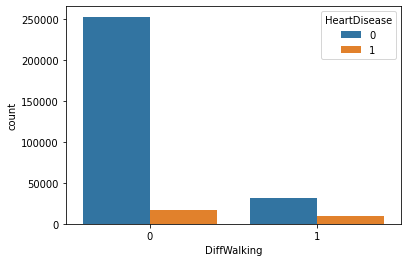

In [77]:
sns.countplot(data=df,x="DiffWalking",hue="HeartDisease")


**DiffWalking is definitely correlated**

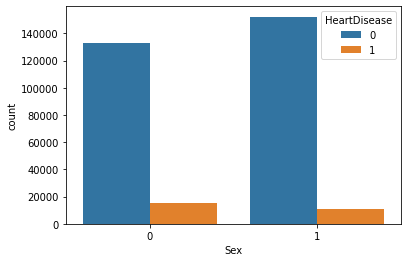

In [78]:
sns.countplot(data=df,x="Sex",hue="HeartDisease")


**Men is slightly more likely to have heart disease**

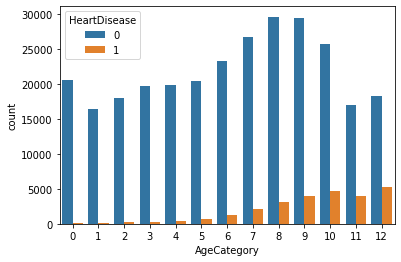

In [79]:
sns.countplot(data=df,x="AgeCategory",hue="HeartDisease")


**Age 55 and higher increase the chances of heart disease**

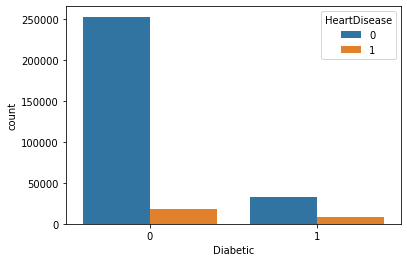

In [80]:
sns.countplot(data=df,x="Diabetic",hue="HeartDisease")


**Diebetes increase chances of heart disease**

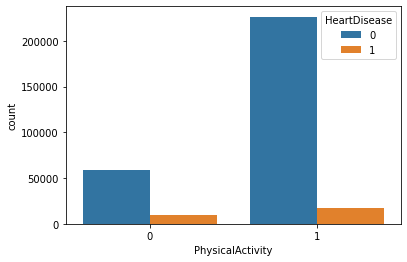

In [81]:
sns.countplot(data=df,x="PhysicalActivity",hue="HeartDisease")


**Less physical activity for people with heart disease**

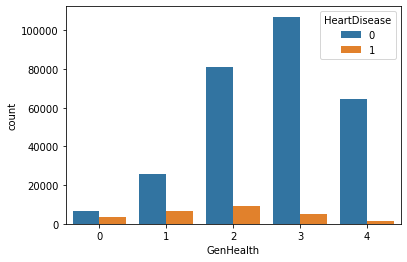

In [82]:
sns.countplot(data=df,x="GenHealth",hue="HeartDisease")


**Better general health condition helps with less likelihood of heart disease**

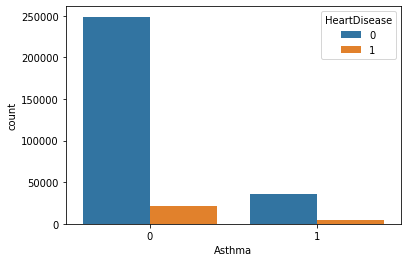

In [83]:
sns.countplot(data=df,x="Asthma",hue="HeartDisease")


**Asthma has impact on heart disease**

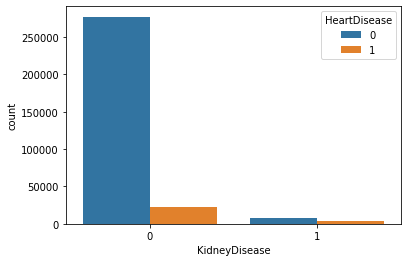

In [84]:
sns.countplot(data=df,x="KidneyDisease",hue="HeartDisease")


**kidney disease has impact on heart disease**

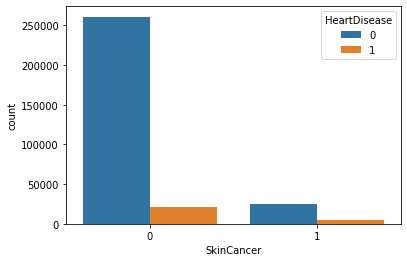

In [85]:
sns.countplot(data=df,x="SkinCancer",hue="HeartDisease")


**Skincancer has impact on heart disease**

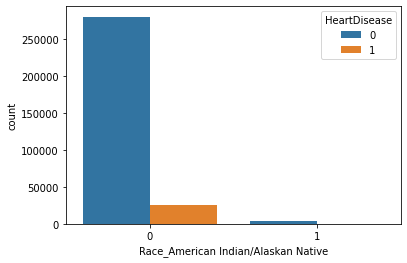

In [86]:
sns.countplot(data=df,x="Race_American Indian/Alaskan Native",hue="HeartDisease")

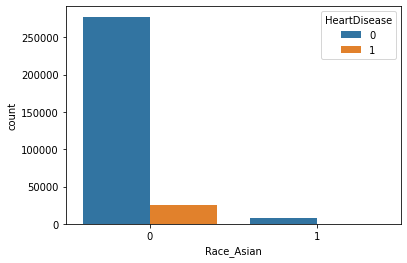

In [87]:
sns.countplot(data=df,x="Race_Asian",hue="HeartDisease")

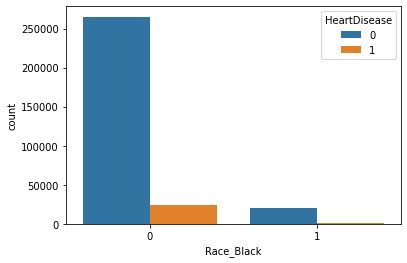

In [88]:
sns.countplot(data=df,x="Race_Black",hue="HeartDisease")

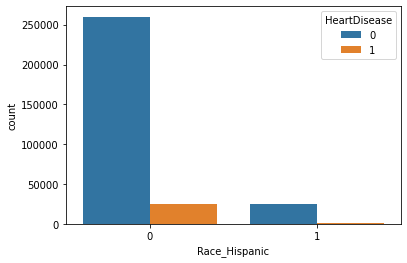

In [89]:
sns.countplot(data=df,x="Race_Hispanic",hue="HeartDisease")

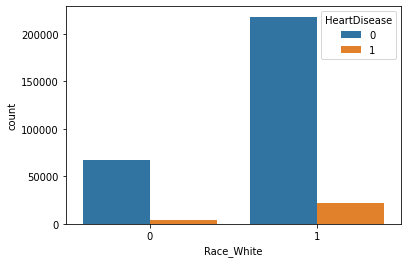

In [90]:
sns.countplot(data=df,x="Race_White",hue="HeartDisease")

**Race does not seem to have obvious impact on heart disease**

For float feature, we use kdeplot

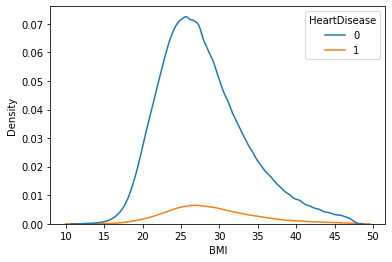

In [91]:
sns.kdeplot(x = df['BMI'], hue = df['HeartDisease'])


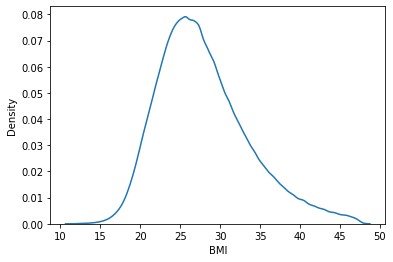

In [92]:
sns.kdeplot(x = df[df.HeartDisease == 0]['BMI'])


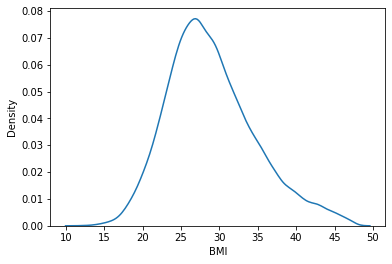

In [93]:
sns.kdeplot(x = df[df.HeartDisease == 1]['BMI'])


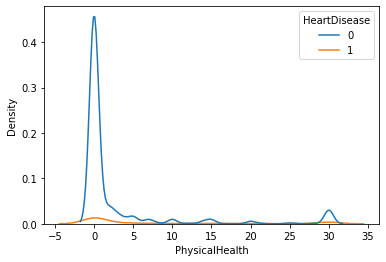

In [94]:
sns.kdeplot(x = df['PhysicalHealth'], hue = df['HeartDisease'])


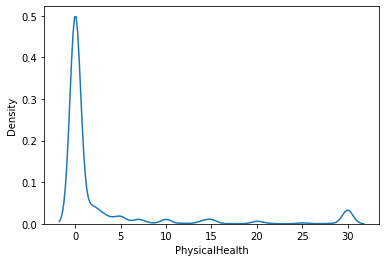

In [95]:
sns.kdeplot(x = df[df.HeartDisease == 0]['PhysicalHealth'])


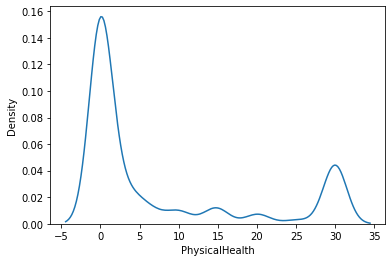

In [96]:
sns.kdeplot(x = df[df.HeartDisease == 1]['PhysicalHealth'])


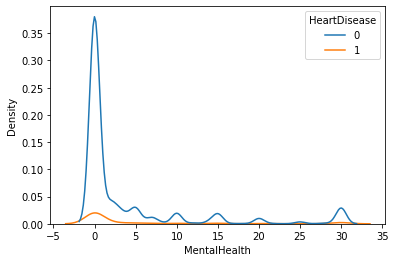

In [97]:
sns.kdeplot(x = df['MentalHealth'], hue = df['HeartDisease'])


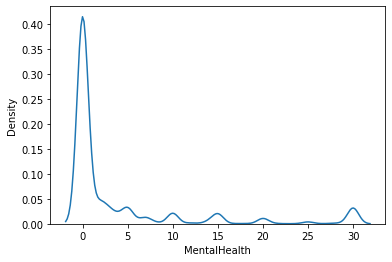

In [98]:
sns.kdeplot(x = df[df.HeartDisease == 0]['MentalHealth'])


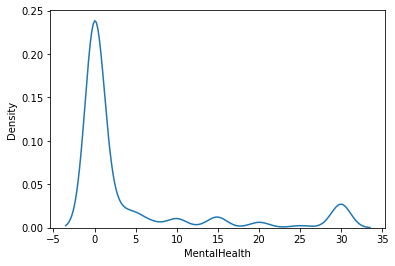

In [99]:
sns.kdeplot(x = df[df.HeartDisease == 1]['MentalHealth'])


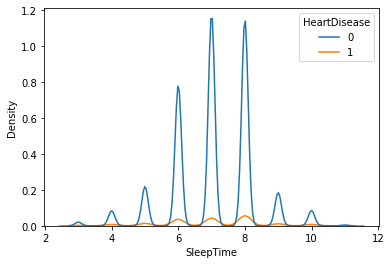

In [100]:
sns.kdeplot(x = df['SleepTime'], hue = df['HeartDisease'])


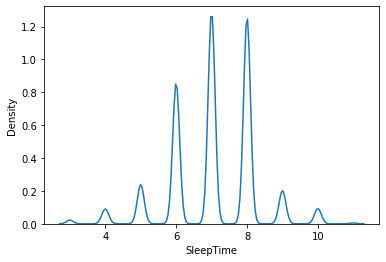

In [101]:
sns.kdeplot(x = df[df.HeartDisease == 0]['SleepTime'])


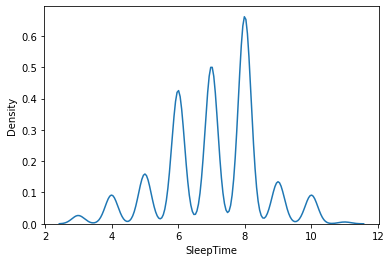

In [102]:
sns.kdeplot(x = df[df.HeartDisease == 1]['SleepTime'])


**By looking into the kde plot of 4 float variables above, we can find out that feature "PhysicalHealth" plays important role and the density distribution between heartdisease and no-heartdisease vary the most**

# Models, Results and Analysis

**We will use df_upsampled dataframe from now on as previously noted, so the label 0 (no heart disease) and label 1 (heart disease) samples are same size in entire dataset**

We will try 3 models for classification:


*   RandomForestClassifier
*   AdaBoostClassifier
*   GradientBoostingClassifier



For those 3 models, We will compare the classification report which includes accuracy, precision, f1 score, etc and also the time consumed for model training and prediction

In [127]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,plot_confusion_matrix,plot_roc_curve

In [104]:
X = df_upsampled.drop("HeartDisease",axis=1)
y = df_upsampled["HeartDisease"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
y_train.value_counts()

0    228222
1    228002
Name: HeartDisease, dtype: int64

In [106]:
y_test.value_counts()

1    57138
0    56918
Name: HeartDisease, dtype: int64

First we start with default model without any hyper parameter tuning

In [107]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import time

In [108]:
default_rf = RandomForestClassifier(random_state=0)
default_ada = AdaBoostClassifier(random_state=0)
default_gb = GradientBoostingClassifier(random_state=0)

In [109]:
start_time = time.time()
default_rf.fit(X_train, y_train)
print("--- %s seconds for training ---" % (time.time() - start_time))

start_time = time.time()
y_pred = default_rf.predict(X_test)
print("--- %s seconds for prediction ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))



--- 56.06659770011902 seconds for training ---
--- 4.840628623962402 seconds for prediction ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56918
           1       0.94      1.00      0.97     57138

    accuracy                           0.97    114056
   macro avg       0.97      0.97      0.97    114056
weighted avg       0.97      0.97      0.97    114056



In [110]:
start_time = time.time()
default_ada.fit(X_train, y_train)
print("--- %s seconds for training ---" % (time.time() - start_time))

start_time = time.time()
y_pred = default_ada.predict(X_test)
print("--- %s seconds for prediction ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

--- 17.05243229866028 seconds for training ---
--- 1.0315628051757812 seconds for prediction ---
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     56918
           1       0.76      0.78      0.77     57138

    accuracy                           0.76    114056
   macro avg       0.76      0.76      0.76    114056
weighted avg       0.76      0.76      0.76    114056



In [111]:
start_time = time.time()
default_gb.fit(X_train, y_train)
print("--- %s seconds for training ---" % (time.time() - start_time))

start_time = time.time()
y_pred = default_gb.predict(X_test)
print("--- %s seconds for prediction ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

--- 61.414018869400024 seconds for training ---
--- 0.22352099418640137 seconds for prediction ---
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     56918
           1       0.75      0.81      0.78     57138

    accuracy                           0.77    114056
   macro avg       0.77      0.77      0.77    114056
weighted avg       0.77      0.77      0.77    114056



With default model, adaboost and gradientboosting classifier perform roughly same while randomforest classifier has huge lead and best score.  
Training time, randomforest and gradientboosting classifier are close and almost twice as adaboost's time consumption.  
For prediction, which is very essential as if you want to use the model in any web application, slow prediction will cause bad user experience, and here randomforest costs almost 4 times of adaboost's, which in turn is about 4 times of gradientboosting's

After some research, I suspect that because of upsampling, we basically generated 200k+ duplicate data on positive label heartattach=1, duplicate data benefit randomforest classifier a lot, while adaboost and gradientboost classifier are much less impacted. To prove it, we will re-do above modelling using default parameters on different sample size 10000, 50000, 100000, 200000, 400000 and use f1_score to compare.

In [112]:
print("Compare f1 score of default models on different sample size \n")

for sample_size in [10000,50000,100000,200000,400000]:
  print("Sample size : ", sample_size)
  df_upsampled_sample = df_upsampled.sample(sample_size)
  X = df_upsampled_sample.drop("HeartDisease",axis=1)
  y = df_upsampled_sample["HeartDisease"]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  default_rf = RandomForestClassifier(random_state=0)
  default_ada = AdaBoostClassifier(random_state=0)
  default_gb = GradientBoostingClassifier(random_state=0)
  default_rf.fit(X_train, y_train)
  default_ada.fit(X_train, y_train)
  default_gb.fit(X_train, y_train)
  print(  " RandomForestClassifier : ", round(f1_score(y_test,default_rf.predict(X_test)),3))
  print(  " AdaBoostClassifier : ", round(f1_score(y_test,default_ada.predict(X_test)),3))
  print(  " GradientBoostingClassifier : ", round(f1_score(y_test,default_gb.predict(X_test)),3))





Compare f1 score of default models on different sample size 

Sample size :  10000
 RandomForestClassifier :  0.767
 AdaBoostClassifier :  0.781
 GradientBoostingClassifier :  0.779
Sample size :  50000
 RandomForestClassifier :  0.823
 AdaBoostClassifier :  0.759
 GradientBoostingClassifier :  0.772
Sample size :  100000
 RandomForestClassifier :  0.867
 AdaBoostClassifier :  0.768
 GradientBoostingClassifier :  0.778
Sample size :  200000
 RandomForestClassifier :  0.916
 AdaBoostClassifier :  0.768
 GradientBoostingClassifier :  0.779
Sample size :  400000
 RandomForestClassifier :  0.958
 AdaBoostClassifier :  0.767
 GradientBoostingClassifier :  0.777


Above analysis proves the suspect so we need a better sampling strategy.  
Generally speaking, upsampling minority class may cause overfit and downsampling majority class may lose valuable information, we can try a hybrid mode to see how it performs.

In [113]:
import imblearn
print(imblearn.__version__)


0.8.1


In [114]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

**Now retry previous check with X,y above after hybrid sampling**

In [115]:
df['HeartDisease'].value_counts()

0    285140
1     26148
Name: HeartDisease, dtype: int64

In [116]:
for sample_size in [10000,50000,100000,200000]:
  print("Sample size : ", sample_size)
  df_sample = df.sample(sample_size)
  X = df_sample.drop("HeartDisease",axis=1)
  y = df_sample["HeartDisease"]
  print(y.value_counts())
  over = RandomOverSampler(sampling_strategy=0.1)
  under = RandomUnderSampler(sampling_strategy=0.5)
  X, y = over.fit_resample(X, y)
  print(y.value_counts())
  X, y = under.fit_resample(X, y)
  print(y.value_counts())
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  default_rf = RandomForestClassifier(random_state=0)
  default_ada = AdaBoostClassifier(random_state=0)
  default_gb = GradientBoostingClassifier(random_state=0)
  default_rf.fit(X_train, y_train)
  default_ada.fit(X_train, y_train)
  default_gb.fit(X_train, y_train)
  print(  " RandomForestClassifier : ", round(f1_score(y_test,default_rf.predict(X_test)),3))
  print(  " AdaBoostClassifier : ", round(f1_score(y_test,default_ada.predict(X_test)),3))
  print(  " GradientBoostingClassifier : ", round(f1_score(y_test,default_gb.predict(X_test)),3))


Sample size :  10000
0    9146
1     854
Name: HeartDisease, dtype: int64
0    9146
1     914
Name: HeartDisease, dtype: int64
0    1828
1     914
Name: HeartDisease, dtype: int64
 RandomForestClassifier :  0.623
 AdaBoostClassifier :  0.575
 GradientBoostingClassifier :  0.627
Sample size :  50000
0    45909
1     4091
Name: HeartDisease, dtype: int64
0    45909
1     4590
Name: HeartDisease, dtype: int64
0    9180
1    4590
Name: HeartDisease, dtype: int64
 RandomForestClassifier :  0.663
 AdaBoostClassifier :  0.634
 GradientBoostingClassifier :  0.662
Sample size :  100000
0    91703
1     8297
Name: HeartDisease, dtype: int64
0    91703
1     9170
Name: HeartDisease, dtype: int64
0    18340
1     9170
Name: HeartDisease, dtype: int64
 RandomForestClassifier :  0.666
 AdaBoostClassifier :  0.624
 GradientBoostingClassifier :  0.649
Sample size :  200000
0    183260
1     16740
Name: HeartDisease, dtype: int64
0    183260
1     18326
Name: HeartDisease, dtype: int64
0    36652
1    

**Now the models' performance look fair across sample sizes, we will adopt this hybrid sampling mode from now on for model tuning in next section**

In [117]:
# start from df for new hybrid sampling strategy
X = df.drop("HeartDisease",axis=1)
y = df["HeartDisease"]
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
X, y = over.fit_resample(X, y)
X, y = under.fit_resample(X, y)


In [118]:
y.value_counts()

0    57028
1    28514
Name: HeartDisease, dtype: int64

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
print("training data size : ", len(y_train))
print("test data size : ", len(y_test))


training data size :  68433
test data size :  17109


**Next, we will run GridSearchCV on these 3 classifiers to find out the best hyperparameters with cross validation 3-fold**

In [129]:
import warnings
warnings.filterwarnings('ignore')

**RandomForestClassifier**

In [122]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_depth' : [5,10,15,20]
}
rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf, param_grid, cv = 3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 500]})

In [123]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [124]:
clf.best_score_

0.7779433898849971

In [125]:
y_pred = clf.predict(X_test)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     11382
           1       0.69      0.62      0.65      5727

    accuracy                           0.78     17109
   macro avg       0.75      0.74      0.74     17109
weighted avg       0.77      0.78      0.77     17109



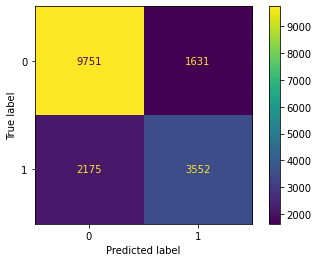

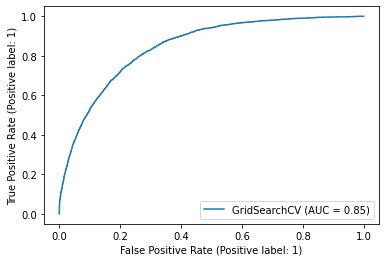

In [130]:
plot_confusion_matrix(clf,X_test, y_test)
plot_roc_curve(clf ,X_test, y_test)

In [133]:
clf.best_estimator_.feature_importances_

array([0.16227752, 0.02486095, 0.00995511, 0.04133955, 0.07111753,
       0.05614746, 0.04813536, 0.03432123, 0.20252183, 0.04027779,
       0.02156255, 0.11852489, 0.07269438, 0.01796964, 0.0197234 ,
       0.0172627 , 0.00410623, 0.00309459, 0.00799331, 0.00778799,
       0.00566569, 0.01266028])

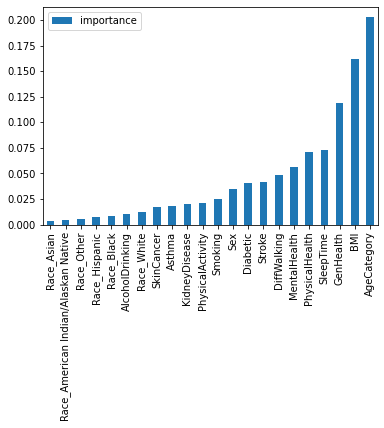

In [138]:
feature_importance_dict = {}  
for feature, importance in zip(X_test.columns, clf.best_estimator_.feature_importances_):
    feature_importance_dict[feature] = importance  

importances = pd.DataFrame.from_dict(feature_importance_dict, orient='index').rename(columns={0: 'importance'})
importances.sort_values(by='importance').plot(kind='bar')

**AdaboostClassifier**

In [140]:
param_grid = { 
    'n_estimators': [50, 100, 200, 500]
}
ada = AdaBoostClassifier(random_state=0)
clf = GridSearchCV(ada, param_grid, cv = 3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': [50, 100, 200, 500]})

In [141]:
clf.best_params_

{'n_estimators': 200}

In [142]:
clf.best_score_

0.7735157014890476

In [143]:
y_pred = clf.predict(X_test)

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     11382
           1       0.70      0.57      0.63      5727

    accuracy                           0.77     17109
   macro avg       0.75      0.72      0.73     17109
weighted avg       0.77      0.77      0.77     17109



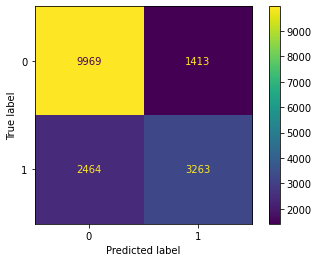

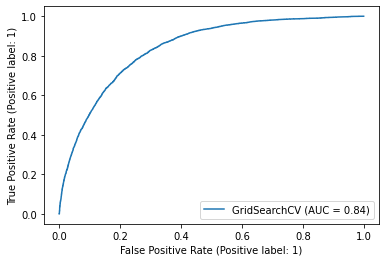

In [145]:
plot_confusion_matrix(clf,X_test, y_test)
plot_roc_curve(clf ,X_test, y_test)

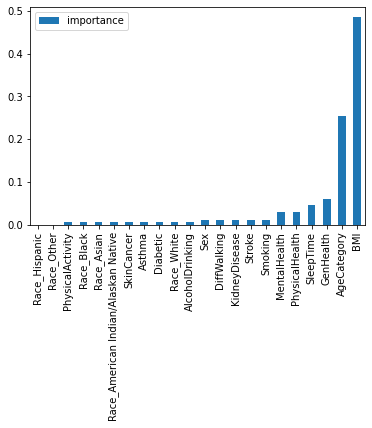

In [146]:
feature_importance_dict = {}  
for feature, importance in zip(X_test.columns, clf.best_estimator_.feature_importances_):
    feature_importance_dict[feature] = importance  

importances = pd.DataFrame.from_dict(feature_importance_dict, orient='index').rename(columns={0: 'importance'})
importances.sort_values(by='importance').plot(kind='bar')

**GradientBoostingcClassifier**

In [148]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_depth' : [5,8,10],
    'ccp_alpha' : [0.0, 0.01, 0.02]
}
gb = GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(gb, param_grid, cv = 3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02],
                         'max_depth': [5, 8, 10], 'n_estimators': [100, 200]})

In [149]:
clf.best_params_

{'ccp_alpha': 0.0, 'max_depth': 5, 'n_estimators': 100}

In [150]:
clf.best_score_

0.7780164540499467

In [151]:
y_pred = clf.predict(X_test)

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     11382
           1       0.68      0.62      0.65      5727

    accuracy                           0.78     17109
   macro avg       0.75      0.74      0.74     17109
weighted avg       0.77      0.78      0.77     17109



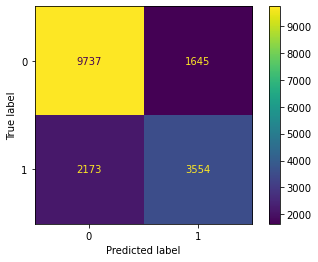

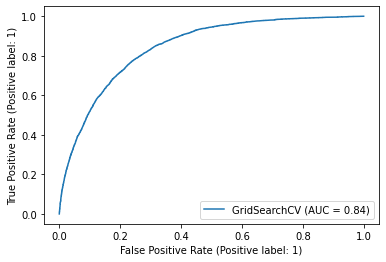

In [153]:
plot_confusion_matrix(clf,X_test, y_test)
plot_roc_curve(clf ,X_test, y_test)

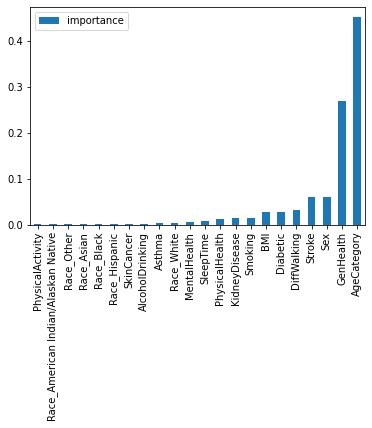

In [154]:
feature_importance_dict = {}  
for feature, importance in zip(X_test.columns, clf.best_estimator_.feature_importances_):
    feature_importance_dict[feature] = importance  

importances = pd.DataFrame.from_dict(feature_importance_dict, orient='index').rename(columns={0: 'importance'})
importances.sort_values(by='importance').plot(kind='bar')

# Discussion and Conclusion

A few takeaways from this project

*   For unbalanced dataset, sampling is a very important pre-processing step, certain models could be heavily impacted by sampling.
*   Most of the top important features are agreed on by those 3 classifiers.
*   False negative are more likely to happen, and this is critical for healthcare related models, which could delay the warning to the potential patient before condition turns more severe.
*   We mentioned that if you give a model always predicting 0, you may achieive 91% accuracy using the dataset, but the model is meaningless in real life for practical use. And the 3 ensemble models' performance are about the same ~ 78% accuracy 



